# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')
df.drop(columns=['pageviews'], inplace=True)

df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

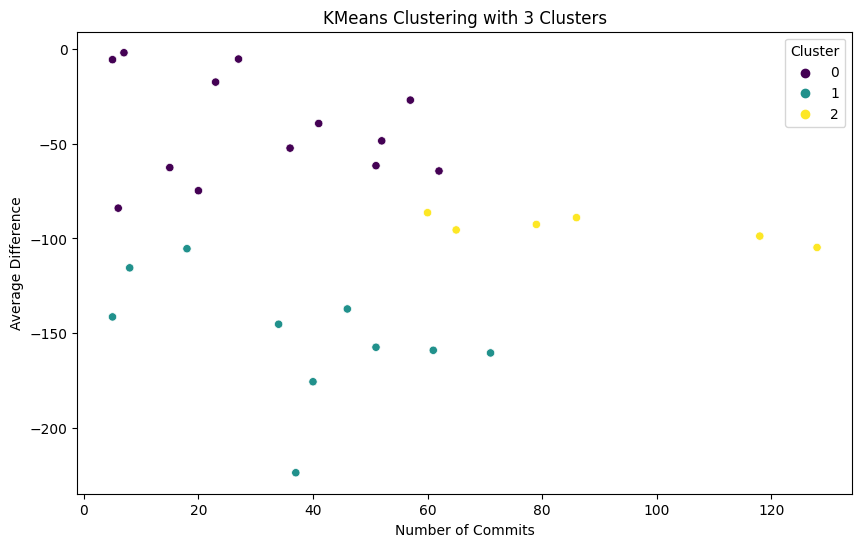

In [3]:
kmeans = KMeans(n_clusters=3, random_state=21)
df['kmeans_3'] = kmeans.fit_predict(df[['num_commits', 'AVG(diff)']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_commits', y='AVG(diff)', hue='kmeans_3', palette='viridis')
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.legend(title='Cluster')
plt.show()

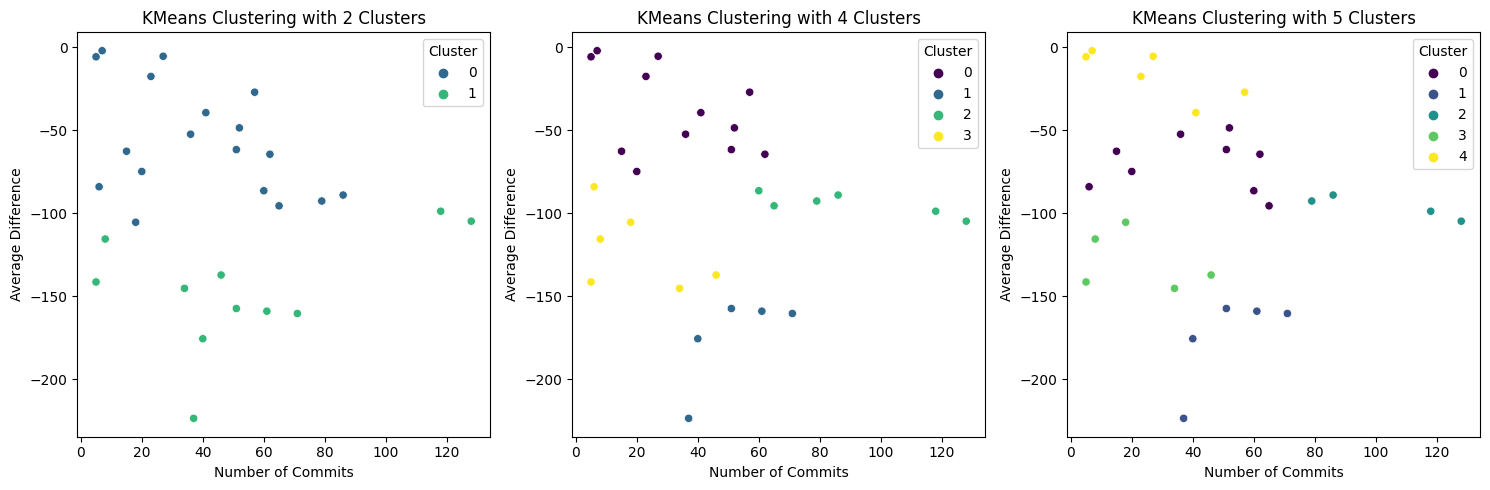

In [4]:
plt.figure(figsize=(15, 5))
for i, n_clusters in enumerate([2, 4, 5]):
    kmeans = KMeans(n_clusters=n_clusters, random_state=21)
    df[f'kmeans_{n_clusters}'] = kmeans.fit_predict(df[['num_commits', 'AVG(diff)']])
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x='num_commits', y='AVG(diff)', hue=f'kmeans_{n_clusters}', palette='viridis')
    plt.title(f'KMeans Clustering with {n_clusters} Clusters')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

In [5]:
silhouette = silhouette_score(df[['num_commits', 'AVG(diff)']], df['kmeans_3'])
print(f"Silhouette Score for n_clusters=3: {silhouette:.4f}")

Silhouette Score for n_clusters=3: 0.4454


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

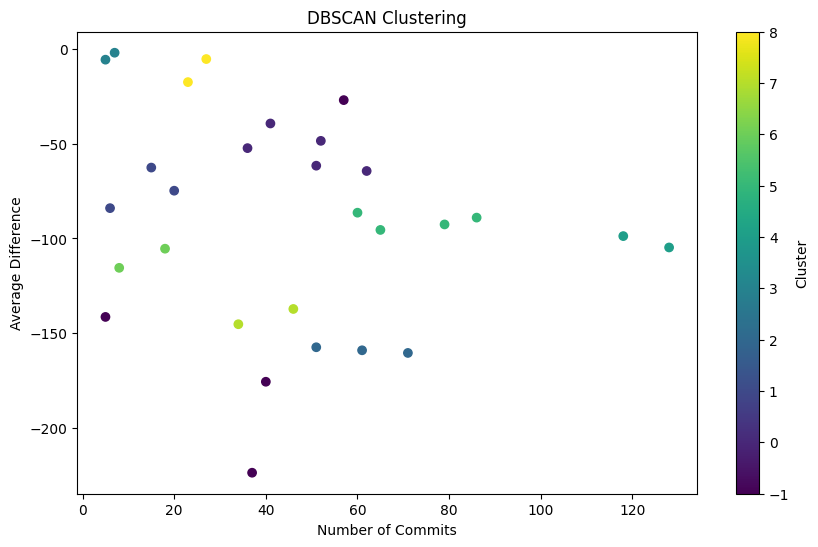

In [6]:
dbscan = DBSCAN(eps=20, min_samples=2)
df['dbscan_20_2'] = dbscan.fit_predict(df[['num_commits', 'AVG(diff)']])

plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['dbscan_20_2'], cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

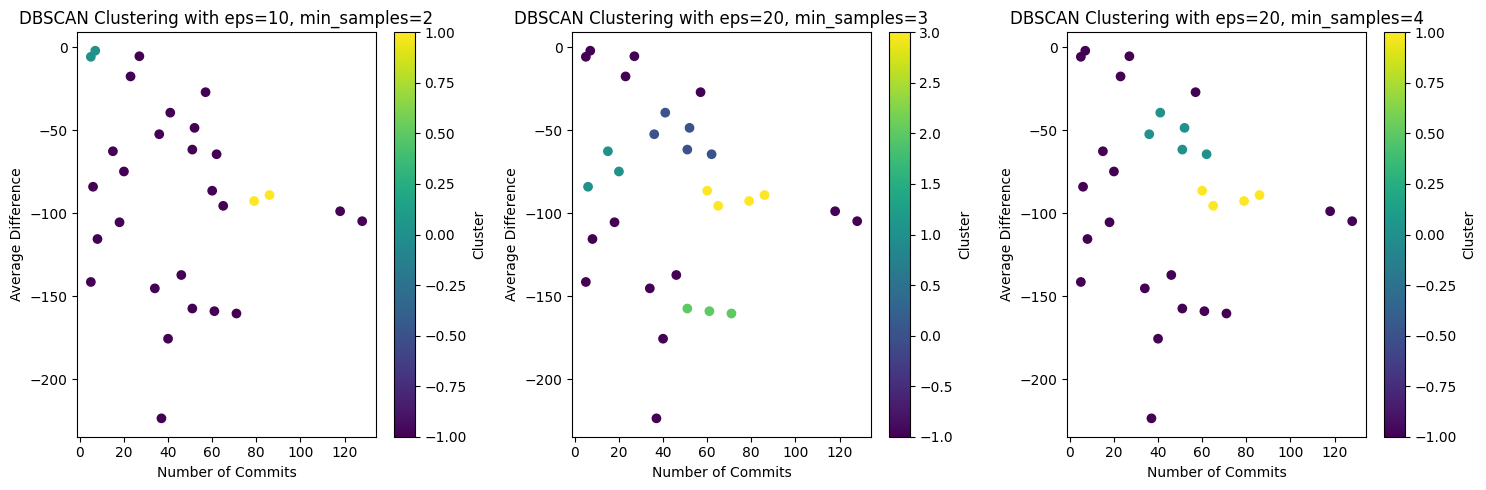

In [7]:
plt.figure(figsize=(15, 5))
for i, (eps, min_samples) in enumerate([(10, 2), (20, 3), (20, 4)]):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df[f'dbscan_{eps}_{min_samples}'] = dbscan.fit_predict(df[['num_commits', 'AVG(diff)']])
    plt.subplot(1, 3, i + 1)
    plt.scatter(df['num_commits'], df['AVG(diff)'], c=df[f'dbscan_{eps}_{min_samples}'], cmap='viridis')
    plt.title(f'DBSCAN Clustering with eps={eps}, min_samples={min_samples}')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

In [8]:
silhouette = silhouette_score(df[['num_commits', 'AVG(diff)']], df['dbscan_20_2'])
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.3834


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

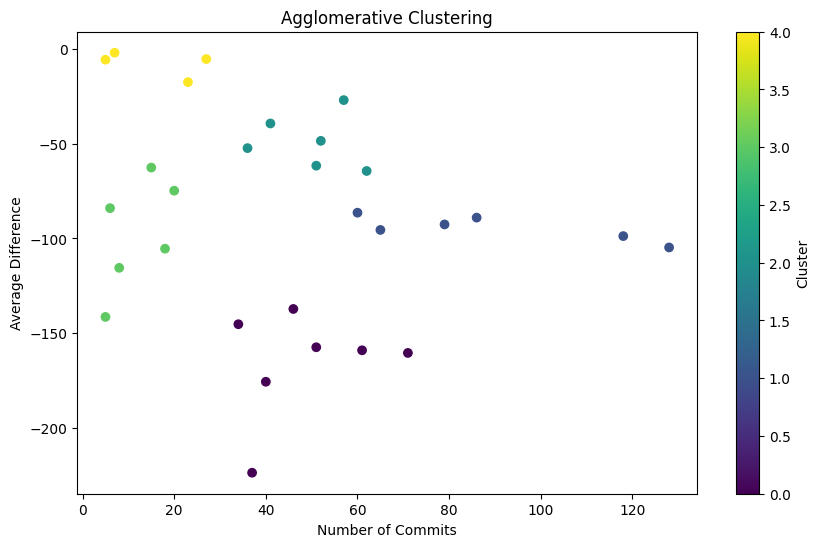

In [9]:
hc = AgglomerativeClustering(n_clusters=5)
df['hc_5'] = hc.fit_predict(df[['num_commits', 'AVG(diff)']])

plt.figure(figsize=(10, 6))
plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['hc_5'], cmap='viridis')
plt.xlabel('Number of Commits')
plt.ylabel('Average Difference')
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')
plt.show()

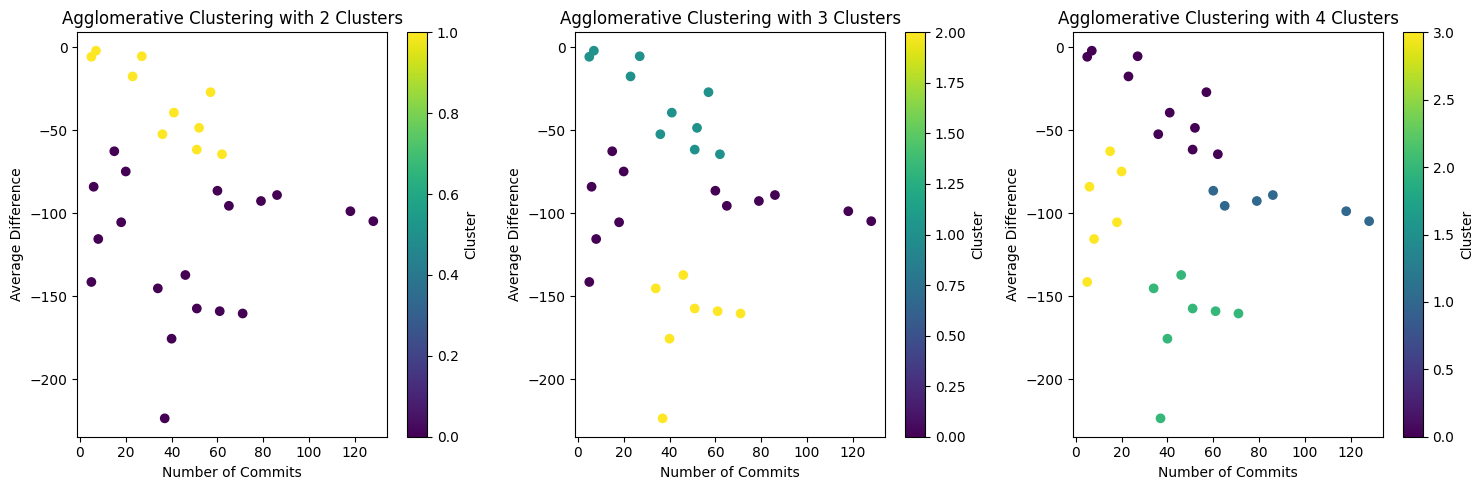

In [10]:
plt.figure(figsize=(15, 5))
for i, n_clusters in enumerate([2, 3, 4]):
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    df[f'hc_{n_clusters}'] = hc.fit_predict(df[['num_commits', 'AVG(diff)']])
    plt.subplot(1, 3, i + 1)
    plt.scatter(df['num_commits'], df['AVG(diff)'], c=df[f'hc_{n_clusters}'], cmap='viridis')
    plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
    plt.xlabel('Number of Commits')
    plt.ylabel('Average Difference')
    plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

In [11]:
silhouette = silhouette_score(df[['num_commits', 'AVG(diff)']], df['hc_5'])
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.4638


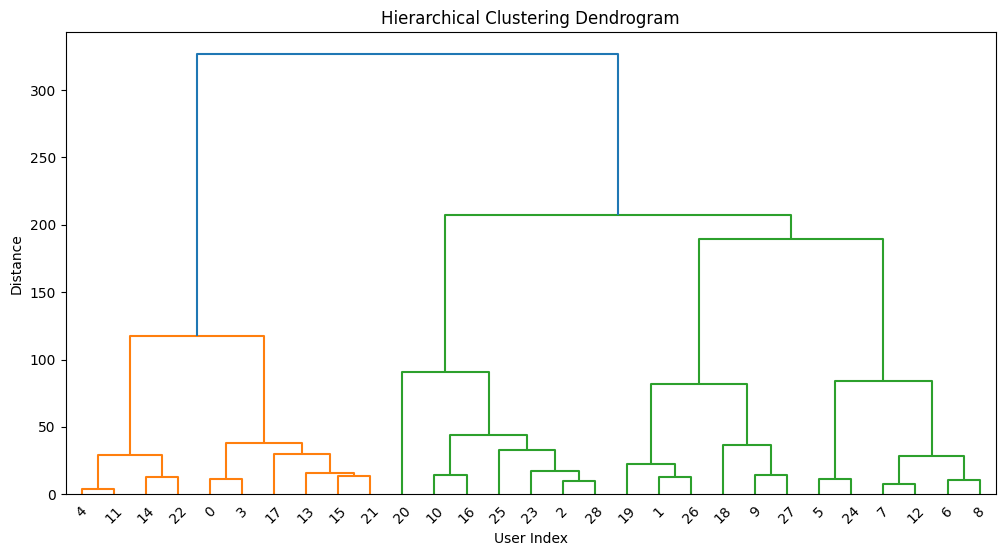

In [12]:
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(df[['num_commits', 'AVG(diff)']], method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('User Index')
plt.ylabel('Distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [13]:
def parameter_search_clustering(model_class, params, param_name, param_range, X):
    silhouette_scores = []
    best_score = -1
    best_param = None
    best_clusters = None

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    for value in param_range:
        params[param_name] = value
        model = model_class(**params)
        clusters = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, clusters)
        silhouette_scores.append(silhouette_avg)

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_param = value
            best_clusters = clusters

    ax1.plot(param_range, silhouette_scores, marker='o')
    ax1.set_xlabel(param_name)
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title('Silhouette Score vs. ' + param_name)

    ax2.scatter(X[:, 0], X[:, 1], c=best_clusters, cmap='viridis')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_title('Best Clustering (Silhouette Score: {:.4f})'.format(best_score))

    plt.tight_layout()
    plt.show()

    return best_param, best_clusters

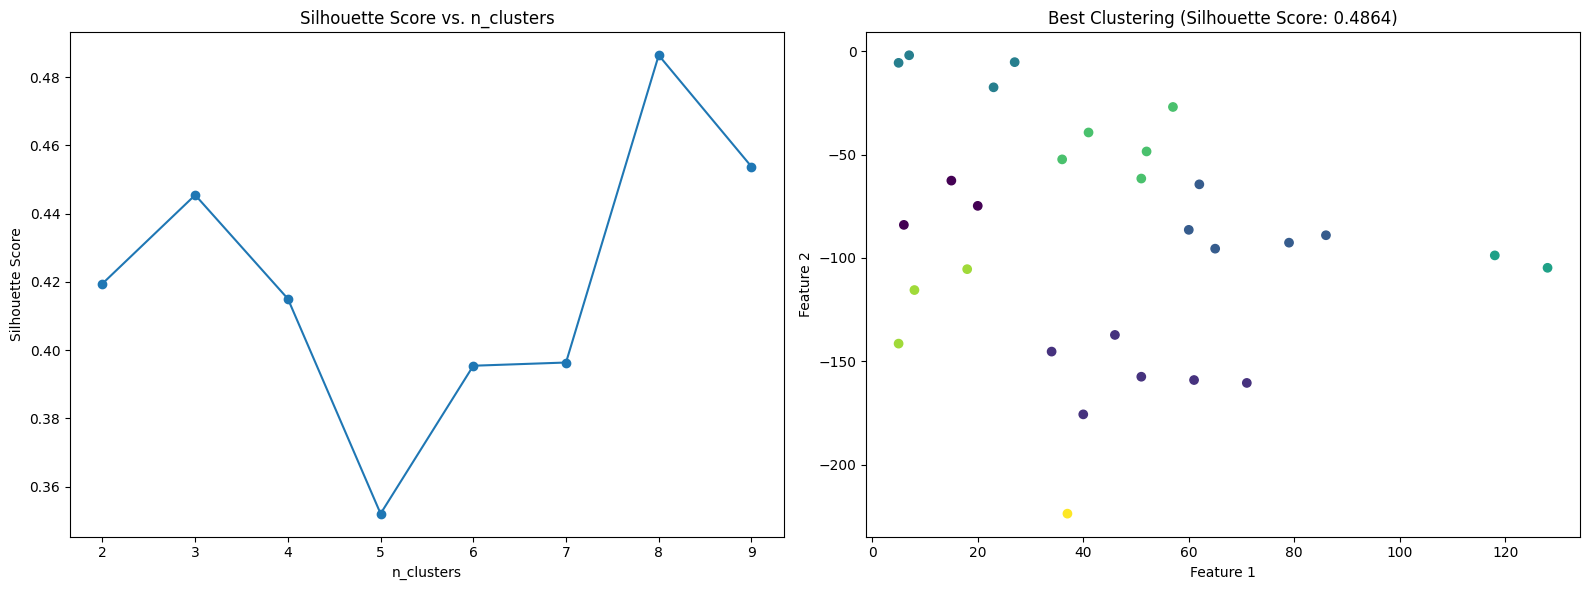

Best number of clusters: 8


In [14]:
best_n_clusters, best_clusters = parameter_search_clustering(
    model_class=KMeans,
    params={'random_state': 21},
    param_name='n_clusters',
    param_range=range(2, 10),
    X=df[['num_commits', 'AVG(diff)']].values
)

print(f"Best number of clusters: {best_n_clusters}")

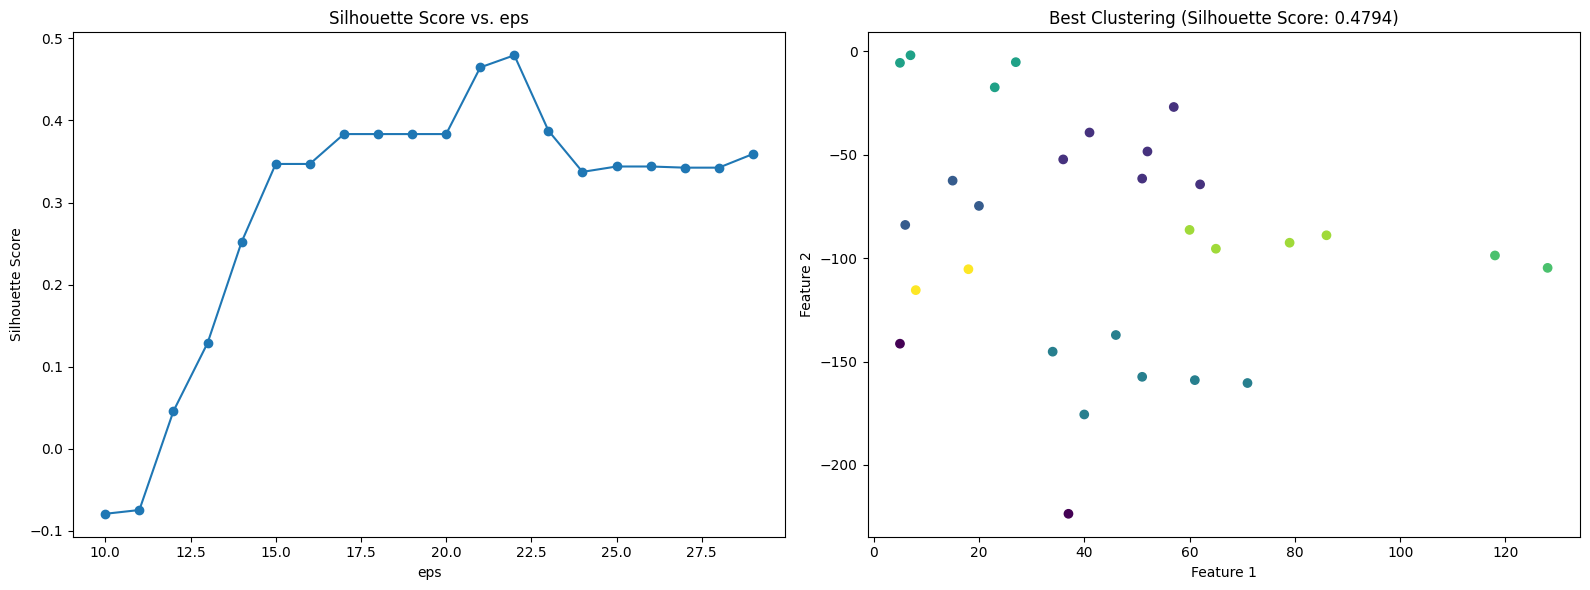

Best eps: 22


In [15]:
best_eps, best_clusters = parameter_search_clustering(
    model_class=DBSCAN,
    params={'min_samples': 2},
    param_name='eps',
    param_range=range(10, 30),
    X=df[['num_commits', 'AVG(diff)']].values
)

print(f"Best eps: {best_eps}")

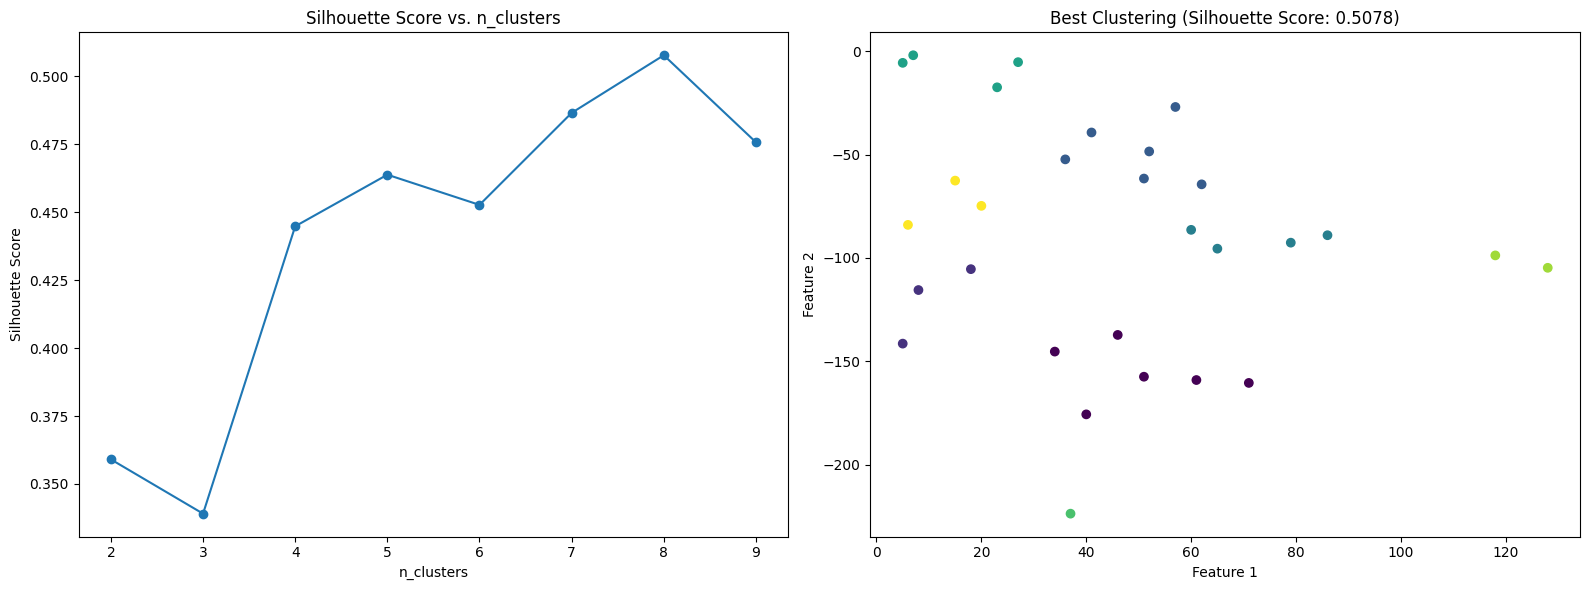

Best number of clusters: 8


In [16]:
best_n_clusters, best_clusters = parameter_search_clustering(
    model_class=AgglomerativeClustering,
    params={},
    param_name='n_clusters',
    param_range=range(2, 10),
    X=df[['num_commits', 'AVG(diff)']].values
)

print(f"Best number of clusters: {best_n_clusters}")